## Load AudioSet VGGish Embeddings

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

# import tensorflow as tf
# import tensorflow_datasets as tfds

import adjustText
# import itertools
# import os
# import csv
# import collections
# import re

# from tqdm.auto import tqdm
save_figures = False
data_path = "../Data"
figure_path = "../Figures"

## Load extracted embeddings

In [2]:
mood_dict = dict(
    zip(range(276,283),
        ['Happy music', 'Funny music', 'Sad music', 'Tender music', 
         'Exciting music', 'Angry music', 'Scary music']
    )
)
print(mood_dict)

{276: 'Happy music', 277: 'Funny music', 278: 'Sad music', 279: 'Tender music', 280: 'Exciting music', 281: 'Angry music', 282: 'Scary music'}


In [3]:
bal_train_context_pd = pd.read_parquet(f"{data_path}/bal_train_music_contexts.parquet")
bal_train_embeddings = np.load(f"{data_path}/bal_train_music_embeddings.npy")

eval_context_pd = pd.read_parquet(f"{data_path}/eval_music_contexts.parquet")
eval_embeddings = np.load(f"{data_path}/eval_music_embeddings.npy")

unbal_train_context_pd = pd.read_parquet(f"{data_path}/unbal_train_music_contexts.parquet")
unbal_train_embeddings = np.load(f"{data_path}/unbal_train_music_embeddings.npy")

In [4]:
display(bal_train_context_pd.head())
display(bal_train_context_pd.tail())

display(eval_context_pd.head())
display(eval_context_pd.tail())

display(unbal_train_context_pd.head())
display(unbal_train_context_pd.tail())

,youtube_id,start_time,end_time,mood,valence,arousal,dominance
0,b'0khKvVDyYV4',240.0,250.0,276,1.0,0.735,0.772
1,b'8Yt55huZGZc',30.0,40.0,276,1.0,0.735,0.772
2,b'RSmNh8gfqg8',240.0,250.0,276,1.0,0.735,0.772
3,b'1-dMI6S5rLs',21.0,31.0,276,1.0,0.735,0.772
4,b'-mA_bqD1tgU',30.0,40.0,276,1.0,0.735,0.772


,youtube_id,start_time,end_time,mood,valence,arousal,dominance
416,b'N0i99VyZCg8',70.0,80.0,282,0.062,0.952,0.528
417,b'YEwikeeqF38',330.0,340.0,282,0.062,0.952,0.528
418,b'hNKTrKk4hZs',80.0,90.0,282,0.062,0.952,0.528
419,b'Hdko95EitpI',40.0,50.0,282,0.062,0.952,0.528
420,b'A-7dmBdsFXc',70.0,80.0,282,0.062,0.952,0.528


,youtube_id,start_time,end_time,mood,valence,arousal,dominance
0,b'xFHF_1FhtIo',110.0,120.0,276,1.0,0.735,0.772
1,b'0KCVgexi4yU',30.0,40.0,276,1.0,0.735,0.772
2,b'euAQCWBX6ns',40.0,50.0,276,1.0,0.735,0.772
3,b'2M9GSksX_ho',30.0,40.0,276,1.0,0.735,0.772
4,b'rOn6IPrdXUo',80.0,90.0,276,1.0,0.735,0.772


,youtube_id,start_time,end_time,mood,valence,arousal,dominance
415,b'Qa-Qs9CtOOw',30.0,40.0,282,0.062,0.952,0.528
416,b'iFOwlZfNTO4',30.0,40.0,282,0.062,0.952,0.528
417,b'n7WM-2sI2Uo',410.0,420.0,282,0.062,0.952,0.528
418,b'VeuetUsa9d0',30.0,40.0,282,0.062,0.952,0.528
419,b'k-J2-Ou1Fm8',30.0,40.0,282,0.062,0.952,0.528


,youtube_id,start_time,end_time,mood,valence,arousal,dominance
0,b'8FPA_Y7sssI',30.0,40.0,276,1.0,0.735,0.772
1,b'8ffdVTnJdKI',30.0,40.0,276,1.0,0.735,0.772
2,b'AeY-sUZDSKY',230.0,240.0,276,1.0,0.735,0.772
3,b'Bj7u7piJfXc',24.0,34.0,276,1.0,0.735,0.772
4,b'bj8XI04XnNQ',30.0,40.0,276,1.0,0.735,0.772


,youtube_id,start_time,end_time,mood,valence,arousal,dominance
16109,b'F5mgSqN9hKA',0.0,10.0,282,0.062,0.952,0.528
16110,b'53Dqp73SGJY',170.0,180.0,282,0.062,0.952,0.528
16111,b'p0AfKyseeNg',70.0,80.0,282,0.062,0.952,0.528
16112,b'i7q_PlWGJUM',10.0,20.0,282,0.062,0.952,0.528
16113,b'_YPRM2_IgOY',110.0,120.0,282,0.062,0.952,0.528


In [5]:
print(bal_train_embeddings.shape)
print(eval_embeddings.shape)
print(unbal_train_embeddings.shape)

(421, 10, 128)
(420, 10, 128)
(16114, 10, 128)


## Visualize a few examples

In [6]:
def visualize_music_embedding(contexts, embeddings, index):
    embedding = embeddings[index]
    mood = contexts.loc[index, "mood"]
    
    fig_embeddings, ax_embeddings = plt.subplots()

    ax_embeddings.set_title(mood_dict[mood])
    ax_embeddings.imshow(embedding, 
               cmap = 'BrBG')
    ax_embeddings.set_xlabel("VGGish Embedding")
    ax_embeddings.set_ylabel("Seconds")
    
    return fig_embeddings, ax_embeddings

In [7]:
def save_figure(fig, name, figure_path = figure_path, save_figures = save_figures):
    if save_figures:
        filename = f"{figure_path}/{name}"
        fig.savefig(f"{filename}.pdf", 
                    dpi = 300, 
                    bbox_inches="tight")
        fig.savefig(f"{filename}.png", 
                    dpi = 300, 
                    bbox_inches="tight")
        fig.savefig(f"{filename}.svg", 
                    dpi = 300, 
                    bbox_inches="tight")

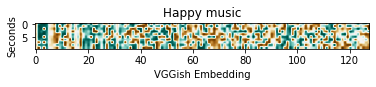

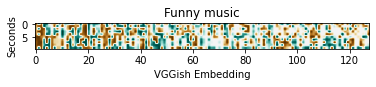

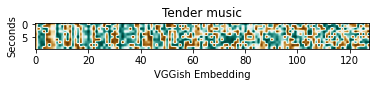

In [8]:
fig_unbal_1, _ = visualize_music_embedding(unbal_train_context_pd, unbal_train_embeddings, 123)
fig_unbal_2, _ = visualize_music_embedding(unbal_train_context_pd, unbal_train_embeddings, 2345)
fig_unbal_3, _ = visualize_music_embedding(unbal_train_context_pd, unbal_train_embeddings, 7890)

save_figure(fig_unbal_1, "unbal_happy")
save_figure(fig_unbal_2, "unbal_funny")
save_figure(fig_unbal_3, "unbal_tender")

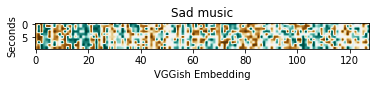

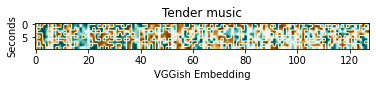

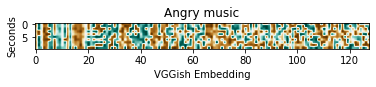

In [9]:
fig_bal_1, _ = visualize_music_embedding(bal_train_context_pd, bal_train_embeddings, 123)
fig_bal_2, _ = visualize_music_embedding(bal_train_context_pd, bal_train_embeddings, 234)
fig_bal_3, _ = visualize_music_embedding(bal_train_context_pd, bal_train_embeddings, 345)

save_figure(fig_bal_1, "bal_sad")
save_figure(fig_bal_2, "bal_tender")
save_figure(fig_bal_3, "bal_angry")

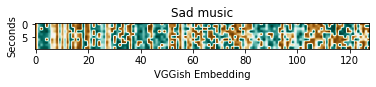

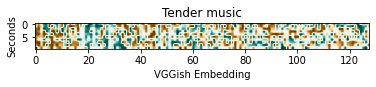

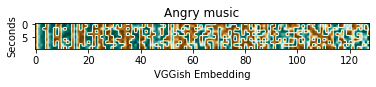

In [10]:
fig_eval_1, _ = visualize_music_embedding(eval_context_pd, eval_embeddings, 123)
fig_eval_2, _ = visualize_music_embedding(eval_context_pd, eval_embeddings, 234)
fig_eval_3, _ = visualize_music_embedding(eval_context_pd, eval_embeddings, 345)

save_figure(fig_eval_1, "eval_sad")
save_figure(fig_eval_2, "eval_tender")
save_figure(fig_eval_3, "eval_angry")

## Music by mood

In [11]:
bal_train_summary = bal_train_context_pd[["youtube_id", "mood"]]\
                        .groupby("mood")\
                        .agg("count")
eval_summary = eval_context_pd[["youtube_id", "mood"]]\
                   .groupby("mood")\
                   .agg("count")
unbal_train_summary = unbal_train_context_pd[["youtube_id", "mood"]]\
                          .groupby("mood")\
                          .agg("count")

In [12]:
music_all_summary = pd.DataFrame(
    {"unbal_train":unbal_train_summary ["youtube_id"].to_numpy(),
     "bal_train":bal_train_summary["youtube_id"].to_numpy(),
     "eval":eval_summary["youtube_id"].to_numpy()}, 
    index = ['Happy music', 'Funny music', 'Sad music', 'Tender music', 
             'Exciting music', 'Angry music', 'Scary music'])

In [13]:
# music_all_summary.sort_values(by = ["unbal_train"], 
#                               ascending = [False], 
#                               inplace = True, 
#                               axis = 0)

music_all_summary.eval("Weight_raw = 1.0/unbal_train", inplace = True)
raw_sum = music_all_summary["Weight_raw"].to_numpy().sum()
music_all_summary.eval(f"Weight = Weight_raw/{raw_sum}", inplace = True)

music_all_summary

,unbal_train,bal_train,eval,Weight_raw,Weight
Happy music,1338,61,60,0.000747,0.170389
Funny music,1035,60,60,0.000966,0.220271
Sad music,1650,60,60,0.000606,0.138170
Tender music,3971,60,60,0.000252,0.057411
Exciting music,5518,60,60,0.000181,0.041316
Angry music,985,60,60,0.001015,0.231452
Scary music,1617,60,60,0.000618,0.140990


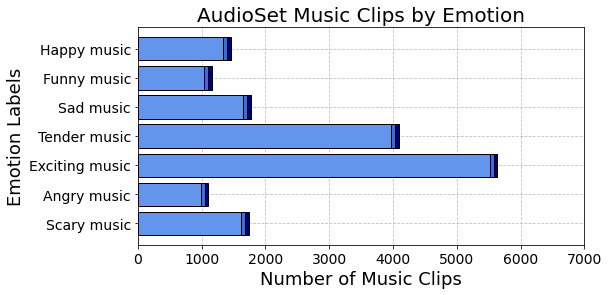

In [14]:
fig_bar_both, ax_bar_both = plt.subplots()

ax_bar_both.barh(y = music_all_summary.index,
                 width = music_all_summary.loc[:, "unbal_train"],
                 height = 0.8, 
                 color = "cornflowerblue", 
                 edgecolor = "black", 
                 zorder = 100,
                )

ax_bar_both.barh(y = music_all_summary.index,
                 width = music_all_summary.loc[:, "bal_train"],
                 left = music_all_summary.loc[:, "unbal_train"],
                 height = 0.8, 
                 color = "royalblue", 
                 edgecolor = "black", 
                 zorder = 100,
                )

ax_bar_both.barh(y = music_all_summary.index,
                 width = music_all_summary.loc[:, "eval"],
                 left = (music_all_summary.loc[:, "unbal_train"] + music_all_summary.loc[:, "bal_train"]),
                 height = 0.8, 
                 color = "navy", 
                 edgecolor = "black", 
                 zorder = 100,
                )

ax_bar_both.set_yticks(ax_bar_both.get_yticks(), 
                       music_all_summary.index, 
                       fontsize = 14)

xticks = np.arange(0, 7500, 1000)
xtick_labels = [f"{x}" for x in xticks]
ax_bar_both.set_xticks(xticks)
ax_bar_both.set_xticklabels(xtick_labels, fontsize = 14)

ax_bar_both.invert_yaxis()
ax_bar_both.set_xlim(left = 0, right = 7000)


ax_bar_both.grid(linestyle = "dashed", 
            color = "#bfbfbf", 
            zorder = -100)

ax_bar_both.set_xlabel("Number of Music Clips", fontsize = 18) 
ax_bar_both.set_ylabel("Emotion Labels", fontsize = 18)
ax_bar_both.set_title("AudioSet Music Clips by Emotion", fontsize = 20)

fig_bar_both.set_size_inches([8, 4])

save_figure(fig_bar_both, "AudioSet Distribution")

In [15]:
music_all_summary.eval("total = unbal_train + bal_train + eval", inplace = True)
music_all_summary.eval("unbal_train_ratio = unbal_train/total", inplace = True)
music_all_summary.eval("bal_train_ratio = bal_train/total", inplace = True)
music_all_summary.eval("eval_ratio = eval/total", inplace = True)
music_all_summary

,unbal_train,bal_train,eval,Weight_raw,Weight,total,unbal_train_ratio,bal_train_ratio,eval_ratio
Happy music,1338,61,60,0.000747,0.170389,1459,0.917066,0.041809,0.041124
Funny music,1035,60,60,0.000966,0.220271,1155,0.896104,0.051948,0.051948
Sad music,1650,60,60,0.000606,0.138170,1770,0.932203,0.033898,0.033898
Tender music,3971,60,60,0.000252,0.057411,4091,0.970667,0.014666,0.014666
Exciting music,5518,60,60,0.000181,0.041316,5638,0.978716,0.010642,0.010642
Angry music,985,60,60,0.001015,0.231452,1105,0.891403,0.054299,0.054299
Scary music,1617,60,60,0.000618,0.140990,1737,0.930915,0.034542,0.034542


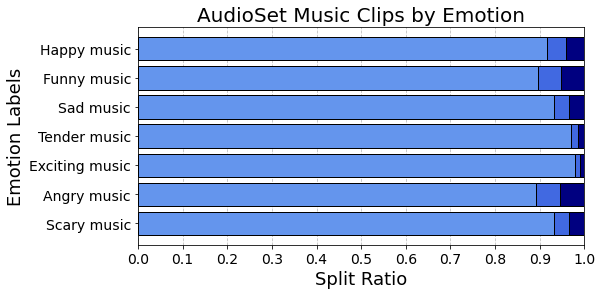

In [16]:
fig_bar_ratio, ax_bar_ratio = plt.subplots()

ax_bar_ratio.barh(y = music_all_summary.index,
                  width = music_all_summary.loc[:, "unbal_train_ratio"],
                  height = 0.8, 
                  color = "cornflowerblue", 
                  edgecolor = "black", 
                  zorder = 100,
                 )

ax_bar_ratio.barh(y = music_all_summary.index,
                  width = music_all_summary.loc[:, "bal_train_ratio"],
                  left = music_all_summary.loc[:, "unbal_train_ratio"],
                  height = 0.8, 
                  color = "royalblue", 
                  edgecolor = "black", 
                  zorder = 100,
                 )

ax_bar_ratio.barh(y = music_all_summary.index,
                  width = music_all_summary.loc[:, "eval_ratio"],
                  left = (music_all_summary.loc[:, "unbal_train_ratio"] + music_all_summary.loc[:, "bal_train_ratio"]),
                  height = 0.8, 
                  color = "navy", 
                  edgecolor = "black", 
                  zorder = 100,
                 )

ax_bar_ratio.set_yticks(ax_bar_both.get_yticks(), 
                        music_all_summary.index, 
                        fontsize = 14)

xticks = np.arange(0, 1.1, 0.1)
xtick_labels = [f"{x:1.1f}" for x in xticks]
ax_bar_ratio.set_xticks(xticks)
ax_bar_ratio.set_xticklabels(xtick_labels, fontsize = 14)

ax_bar_ratio.invert_yaxis()
ax_bar_ratio.set_xlim(left = 0.0, right = 1.0)


ax_bar_ratio.grid(linestyle = "dashed", 
                  color = "#bfbfbf", 
                  zorder = -100)

ax_bar_ratio.set_xlabel("Split Ratio", fontsize = 18) 
ax_bar_ratio.set_ylabel("Emotion Labels", fontsize = 18)
ax_bar_ratio.set_title("AudioSet Music Clips by Emotion", fontsize = 20)

fig_bar_ratio.set_size_inches([8, 4])
save_figure(fig_bar_ratio, "AudioSet Ratio")

## Music sequence length

In [17]:
bal_train_context_pd.eval("length = end_time - start_time", inplace = True)
bal_train_context_pd[["youtube_id", "mood", "length"]].groupby(["mood", "length"]).agg("count")

,,youtube_id
mood,length,
276,10.0,61
277,10.0,60
278,10.0,60
279,10.0,60
280,10.0,60
281,10.0,60
282,10.0,60


In [18]:
unbal_train_context_pd.eval("length = end_time - start_time", inplace = True)

In [19]:
unbal_train_context_pd[["youtube_id", "mood", "length"]].groupby(["mood", "length"]).agg("count")

youtube_id
mood length            
276  8.0              1
     9.0              2
     10.0          1335
277  4.0              3
     5.0              3
     7.0              3
     8.0              4
     9.0              5
     10.0          1017
278  8.0              1
     10.0          1649
279  3.0              2
     5.0              3
     8.0              1
     9.0              3
     10.0          3962
280  3.0              1
     5.0              3
     6.0              2
     7.0              4
     8.0              4
     9.0             11
     10.0          5493
281  10.0           985
282  2.0              1
     5.0              2
     6.0              1
     7.0              2
     8.0              3
     10.0          1608

## Music mapping

In [20]:
music_VAD_mapping = np.array([
    [1,0.735,0.772],
    [0.918,0.61,0.566],
    [0.225,0.333,0.149],
    [0.63,0.52,0.509],
    [0.95,0.792,0.789],
    [0.122,0.83,0.604],
    [0.062,0.952,0.528],
])

In [21]:
music_vad_mapping_pd = pd.DataFrame(
    columns = ["valence", "arousal", "dominance"], 
    data = music_VAD_mapping, 
    index = ['Happy music', 'Funny music', 'Sad music', 'Tender music', 
             'Exciting music', 'Angry music', 'Scary music'])

display(music_vad_mapping_pd)

,valence,arousal,dominance
Happy music,1.000,0.735,0.772
Funny music,0.918,0.610,0.566
Sad music,0.225,0.333,0.149
Tender music,0.630,0.520,0.509
Exciting music,0.950,0.792,0.789
Angry music,0.122,0.830,0.604
Scary music,0.062,0.952,0.528


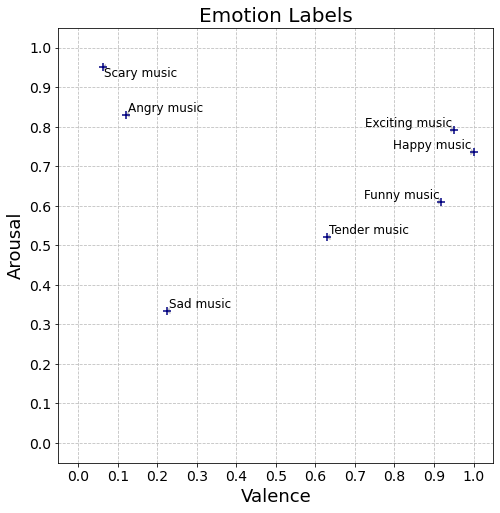

In [22]:
fig_mapping, ax_mapping = plt.subplots()
ax_mapping.scatter(x = music_vad_mapping_pd.loc[:, "valence"], 
                   y = music_vad_mapping_pd.loc[:, "arousal"], 
                   marker = "+",
                   s = 50,
                   color = "navy",
                   zorder = 100)


annotations = []
for i, each_emotion_name in enumerate(music_vad_mapping_pd.index):
    annotations.append(
        ax_mapping.annotate(each_emotion_name.capitalize(), 
                            (music_VAD_mapping[i, 0], music_VAD_mapping[i, 1]), 
                            # xytext = (emotion_vad_mapping[i, 0] + 0.05, emotion_vad_mapping[i, 1] + 0.05),
                            # xycoords = "data",
                            # arrowprops = {"width": 1, 
                            #               "headwidth": 10, 
                            #               "headlength": 5, 
                            #               "color":"black"},
                            zorder = 50,
                            fontsize = 12)
    )
    
adjustText.adjust_text(annotations,
                       expand_text = (1.025, 1.025),
                       expand_points = (1.05, 1.05),
                       expand_objects = (1.025, 1.025),
                       expand_align = (1.025, 1.025),
                       arrowprops = {"width": 0.25, 
                                     "headwidth": 5, 
                                     "headlength": 2.5, 
                                     "color":"silver", 
                                     "zorder":-100},
                      )
    
ax_mapping.grid(linestyle = "dashed", 
                color = "#bfbfbf", 
                zorder = -200)

xticks = np.arange(0.0, 1.1, 0.1)
xtick_labels = [f"{x:1.1f}" for x in xticks]
ax_mapping.set_xticks(xticks)
ax_mapping.set_xticklabels(xtick_labels, fontsize = 14)

yticks = np.arange(0.0, 1.1, 0.1)
ytick_labels = [f"{y:1.1f}" for y in yticks]
ax_mapping.set_yticks(yticks)
ax_mapping.set_yticklabels(ytick_labels, fontsize = 14)

ax_mapping.set_ylim(top = 1.05, bottom = -0.05)
ax_mapping.set_xlim(left = -0.05, right = 1.05)

ax_mapping.set_xlabel("Valence", fontsize = 18) 
ax_mapping.set_ylabel("Arousal", fontsize = 18)
ax_mapping.set_title("Emotion Labels", fontsize = 20)

fig_mapping.set_size_inches([8, 8])
ax_mapping.set_aspect(aspect = "equal")
save_figure(fig_mapping, "AudioSet Emotion Labels VA")

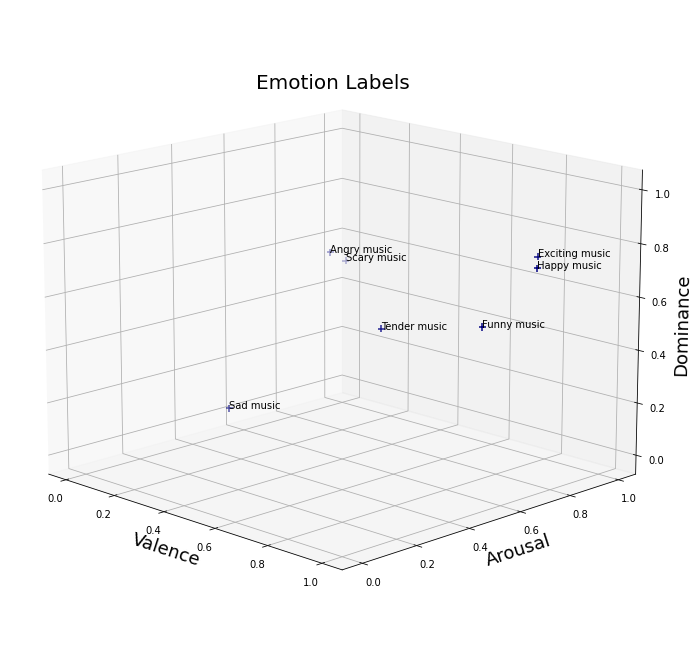

In [23]:
fig_mapping3D = plt.figure()
ax_mapping3D = fig_mapping3D.add_subplot(projection='3d')

ax_mapping3D.scatter(music_vad_mapping_pd.loc[:, "valence"], 
                     music_vad_mapping_pd.loc[:, "arousal"], 
                     zs = music_vad_mapping_pd.loc[:, "dominance"], 
                     marker = "+",
                     s = 50,
                     color = "navy")


annotations = []
for i, each_emotion_name in enumerate(music_vad_mapping_pd.index):
    annotations.append(
        ax_mapping3D.text(music_VAD_mapping[i, 0], 
                          music_VAD_mapping[i, 1], 
                          music_VAD_mapping[i, 2],
                          each_emotion_name.capitalize(),
                          (1, 1, 0),
                          fontsize = 10)
    )


ax_mapping3D.set_xlim(-0.05, 1.05)
ax_mapping3D.set_ylim(-0.05, 1.05)
ax_mapping3D.set_zlim(-0.05, 1.05)

ax_mapping3D.set_xlabel('Valence', fontsize = 18)
ax_mapping3D.set_ylabel('Arousal', fontsize = 18)
ax_mapping3D.set_zlabel('Dominance', fontsize = 18)
ax_mapping3D.set_title("Emotion Labels", fontsize = 20,
                       y = 1.0, 
                       pad = -30)
    
fig_mapping3D.set_size_inches([12, 12])
ax_mapping3D.view_init(15, -45)
save_figure(fig_mapping3D, "AudioSet Emotion Labels VAD(3D)")

## Sample Weight

In [24]:
weight_dict = dict(
    zip(range(276,283), music_all_summary["Weight"].to_numpy())
)
weight_dict

{276: 0.17038914121523913,
 277: 0.22027117965796128,
 278: 0.13817010360363027,
 279: 0.05741140038932005,
 280: 0.041315815684304084,
 281: 0.23145245781318777,
 282: 0.1409899016363574}

In [25]:
bal_train_context_pd["Weight"] = 0.0

bal_sample_weights_list = []
for each_mood in bal_train_context_pd["mood"].to_numpy():
    bal_sample_weights_list.append(weight_dict[each_mood])
    
bal_train_context_pd["Weight"] = np.array(bal_sample_weights_list)
display(bal_train_context_pd.head())

,youtube_id,start_time,end_time,mood,valence,arousal,dominance,length,Weight
0,b'0khKvVDyYV4',240.0,250.0,276,1.0,0.735,0.772,10.0,0.170389
1,b'8Yt55huZGZc',30.0,40.0,276,1.0,0.735,0.772,10.0,0.170389
2,b'RSmNh8gfqg8',240.0,250.0,276,1.0,0.735,0.772,10.0,0.170389
3,b'1-dMI6S5rLs',21.0,31.0,276,1.0,0.735,0.772,10.0,0.170389
4,b'-mA_bqD1tgU',30.0,40.0,276,1.0,0.735,0.772,10.0,0.170389


In [26]:
eval_context_pd["Weight"] = 0.0

eval_sample_weights_list = []
for each_mood in eval_context_pd["mood"].to_numpy():
    eval_sample_weights_list.append(weight_dict[each_mood])
    
eval_context_pd["Weight"] = np.array(eval_sample_weights_list)
display(eval_context_pd.head())

,youtube_id,start_time,end_time,mood,valence,arousal,dominance,Weight
0,b'xFHF_1FhtIo',110.0,120.0,276,1.0,0.735,0.772,0.170389
1,b'0KCVgexi4yU',30.0,40.0,276,1.0,0.735,0.772,0.170389
2,b'euAQCWBX6ns',40.0,50.0,276,1.0,0.735,0.772,0.170389
3,b'2M9GSksX_ho',30.0,40.0,276,1.0,0.735,0.772,0.170389
4,b'rOn6IPrdXUo',80.0,90.0,276,1.0,0.735,0.772,0.170389


In [27]:
unbal_train_context_pd["Weight"] = 0.0

unbal_sample_weights_list = []
for each_mood in unbal_train_context_pd["mood"].to_numpy():
    unbal_sample_weights_list.append(weight_dict[each_mood])
    
unbal_train_context_pd["Weight"] = np.array(unbal_sample_weights_list)
display(unbal_train_context_pd.head())

,youtube_id,start_time,end_time,mood,valence,arousal,dominance,length,Weight
0,b'8FPA_Y7sssI',30.0,40.0,276,1.0,0.735,0.772,10.0,0.170389
1,b'8ffdVTnJdKI',30.0,40.0,276,1.0,0.735,0.772,10.0,0.170389
2,b'AeY-sUZDSKY',230.0,240.0,276,1.0,0.735,0.772,10.0,0.170389
3,b'Bj7u7piJfXc',24.0,34.0,276,1.0,0.735,0.772,10.0,0.170389
4,b'bj8XI04XnNQ',30.0,40.0,276,1.0,0.735,0.772,10.0,0.170389


In [28]:
bal_train_context_pd.to_parquet(f"{data_path}/bal_train_music_contexts_full.parquet")
eval_context_pd.to_parquet(f"{data_path}/eval_music_contexts_full.parquet")
unbal_train_context_pd.to_parquet(f"{data_path}/unbal_train_music_contexts_full.parquet")